Generate a *shallow* ice shelf that covers that entire domain. This is for debugging reasons, since right now we are getting pressure gradient errors at the IS front. This configuration eliminates this problem.

In [1]:
import netCDF4
import numpy as np
from scipy.ndimage.filters import gaussian_filter
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter
%matplotlib inline
# read provided netcdf
ncpath='../ncfiles/Ocean1_input_geom_v1.01.nc'
x = netCDF4.Dataset(ncpath).variables['x'][::2]
y = netCDF4.Dataset(ncpath).variables['y'][::2]
[X,Y]=np.meshgrid(x/1.0e3,y/1.0e3)

# read 3D file
file3D = netCDF4.Dataset('../ncfiles/Ideal_3D.nc','r+')
area3D=file3D.variables['area'][:]
# read 3D file
file2D = netCDF4.Dataset('../ncfiles/Ideal_2D.nc','r+')
area2D=file2D.variables['area'][:]

# read ocean geometry
depth = netCDF4.Dataset('../ncfiles/ocean_geometry.nc').variables['D'][:]

240


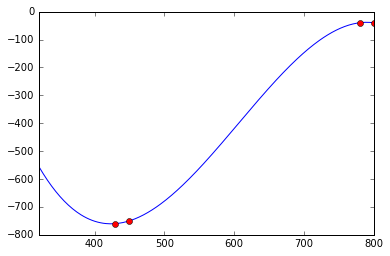

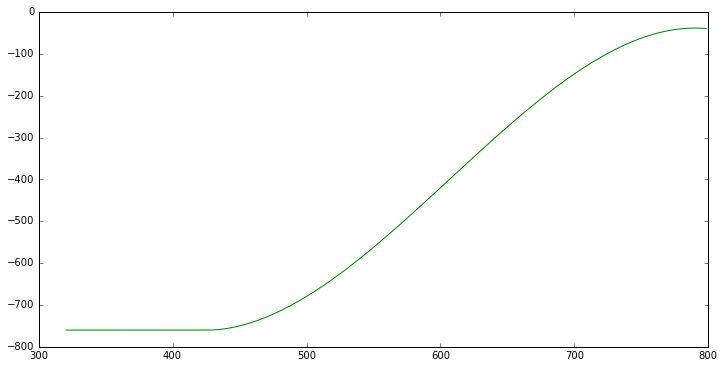

In [2]:
xx=np.array([430,450,780,800])*1.0e3
yy=[-760,-750,-40,-40]

p = np.poly1d(np.polyfit(xx, yy, 3))
lower=p(x)
plt.figure()
plt.plot(x/1.0e3,lower)
plt.plot(xx/1.0e3,yy,'ro')
plt.xlim(320,800)
upper=np.ones(len(x))*10.
a=np.nonzero(x<=430*1.0e3)[-1][-1]
lower[0:a+1]=-760;
 
thick = upper - lower
# plot
plt.figure(figsize=(12,6))
plt.plot(x/1.0e3,lower,'g')
print len(upper)
#plt.xlim(300,350)

In [3]:
# put into arays
area2D = np.ones((area2D.shape))* (x[1]-x[0]) * (y[1]-y[0])
area3D = np.ones((area3D.shape))* (x[1]-x[0]) * (y[1]-y[0])
upper2D = np.ones((area2D.shape))
upper3D = np.ones((area3D.shape))
lower2D = np.ones((area2D.shape))
lower3D = np.ones((area3D.shape))

# 3D
for i in range(area3D.shape[1]):
    for j in range(area2D.shape[0]):
        upper3D[j,i]=upper[j]
        # remove small gaps between ocean bottom and ice shelf
        if (depth[j,i]+lower[j]) <  5.0:
            tmp=lower[j]-(depth[j,i]+lower[j])
            lower3D[j,i]=tmp
        else:
            lower3D[j,i]=lower[j]
    
thick3D=upper3D - lower3D
area3D[thick3D==0.0]=0.0

# 2D
for i in range(area2D.shape[1]):
    upper2D[:,i]=upper[:]
    lower2D[:,i]=lower3D[:,area2D.shape[1]/2]
    
thick2D=upper2D - lower2D
area2D[thick2D==0.0]=0.0

plt.figure()
plt.plot(x/1.0e3,lower

NameError: name 'np' is not defined

In [4]:
# put into netcdf files

# 3D
file3D.variables['area'][:,:] = area3D[:,:]
file3D.variables['thick'][:,:] = thick3D[:,:]


# 2D (middle of the domain)
file2D.variables['area'][:,:] = area2D[:,:]
file2D.variables['thick'][:,:] = thick2D[:,:]


file2D.close()
file3D.close()

NameError: name 'area3D' is not defined